In [ ]:
%pylab inline
plt.style.use("bmh")

In [ ]:
plt.rcParams["figure.figsize"] = (6,6)

In [1]:
import numpy as np
import torch

# Creating tensors

## From NumPy arrays

In [ ]:
np_a = np.random.randn(2, 3)
torch_a = torch.from_numpy(np_a)

In [ ]:
print("NumPy array:")
print(np_a, "\n")
print("PyTorch tensor:")
print(torch_a, "\n")

print(f"NumPy array dtype: {np_a.dtype}")
print(f"PyTorch tensor dtype: {torch_a.dtype}")
print(f"Default PyTorch float: {torch.get_default_dtype()}", "\n")

print(f"Tensor shape: {torch_a.shape}")
print(f"Tensor size: {torch_a.size()}")
print(f"Tensor number of dimensions: {torch_a.dim()}")

Note, that PyTorch reused dtype from the NumPy array. However, `float64` is not the default floating point type for PyTorch:

In [ ]:
torch_a = torch.tensor(np_a, dtype=torch.float)

In [ ]:
torch_a.dtype

In [ ]:
print("NumPy array:")
print(np_a, "\n")
print("PyTorch tensor:")
print(torch_a, "\n")

PyTorch numerical types **are not real Python types**:

In [ ]:
print(type(np.float32), type(torch.float))

## Predefined structure and values

We can create all the common tensor pattern with PyTorch:

In [ ]:
torch.arange(10)

In [ ]:
torch.zeros(2, 3)

In [ ]:
torch.linspace(0, 10, 11)

In [ ]:
torch.zeros(2, 5, dtype=torch.bool)

In [ ]:
torch.ones(2, 5, dtype=torch.bool)

## Random numbers

Random numbers, however, are created differently in PyTorch:

In [ ]:
torch.manual_seed(8436)
a = torch.Tensor(1000)

`a` contains whatever garbage was in memory:

In [ ]:
a

In-place filling of `a` with Gaussian random variable:

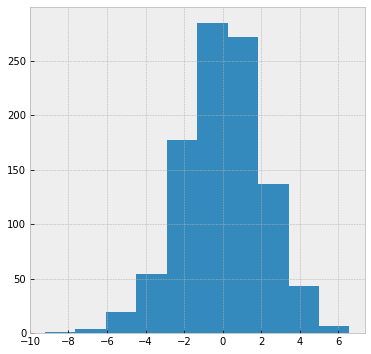

In [27]:
a.normal_(0, 2.)

# plt.hist(a);
# plt.hist(np.array(a));
plt.hist(a.numpy());

Or a uniform disribution:

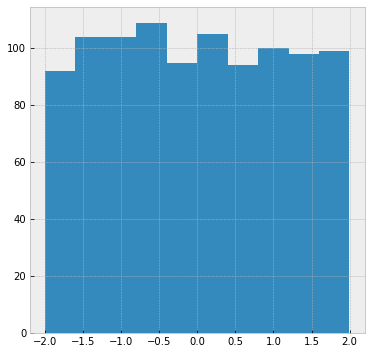

In [28]:
a.uniform_(-2, 2.)

# plt.hist(a);
plt.hist(a.numpy());

### Using distributions

Other distributions are available via `torch.distributions`:

In [ ]:
poisson_sampler = torch.distributions.Poisson(1.)

In [ ]:
samples = poisson_sampler.sample((500,))

In [ ]:
plt.hist(samples, range=(0, 10), bins=10);

# Tensor operations

There are two types of operations in PyTorch: in-place and those, which create a new tensor. In-place operations have `_` in their name as a convention:

In [ ]:
a = torch.Tensor(2, 3)
a.normal_()

Operations, which create new arrays do not:

In [ ]:
# New tensor
print(a.exp())
print(a)

In [ ]:
# Inplace version
print(a.exp_())
print(a)

In [ ]:
b = torch.ones(2, 1)
b

Arithmetics also have two definitions:

In [ ]:
# New tensor
a + b

In [ ]:
a

In [ ]:
# In-place
a.add_(b)

In [ ]:
a

We can chain both in-place and out-of-place operations, as they all conveniently return a tensor they modified/created:

In [ ]:
b.normal_() is b

In [ ]:
a.exp().div(b)

In [ ]:
a.exp_().div_(b)

In [ ]:
a

Boolean operations are vectorized as well:

In [ ]:
a > 16

In [ ]:
a.gt(17)

However:

In [ ]:
a.gt_(14)

# To Python and NumPy

In [ ]:
# Shape the same data with PyTorch tensor
a.numpy()

However, for tensors, which are used in gradient computations, we also need to detach them (to be discussed later).

Note, that indexing of single scalar value works differently to NumPy:

In [ ]:
a[0, 1]  # this is a scalar, i.e. a 0D tensor

To get the value itself:

In [ ]:
a[0, 1].item()

# Reshape and resize

In [ ]:
a = torch.randn(3, 8)
a

In [ ]:
a.view(4, -1)

Views (both direct and coming from indexing) work in a similar fashion to NumPy:

In [ ]:
a[::2, ::2]

In [ ]:
b = a[::2, ::2]
b[0] = 7

In [ ]:
a

In [ ]:
b

In [ ]:
a[::2, ::2].view(2,2,2)

In [ ]:
print("Original:")
print(a, "\n")
print("Sliced:")
print(a[::2, ::2])

In [ ]:
a.dtype

In [ ]:
a[::2, ::2].stride(), a.stride()

In [ ]:
a[::2, ::2].view(2, 2, 2)

In [ ]:
a[::2, ::2].reshape(4, 2)

In [ ]:
a.storage()

To get underlying storage:

In [ ]:
a[::2, ::2].reshape(2, 2, 2).storage().data_ptr()

In [ ]:
a.view(4, 6).storage().data_ptr()==a.storage().data_ptr()